In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ds_test/stressfactor_annotation_dataset/stressfactors-part2.csv')

In [6]:
grouped = df.groupby('top_weighted_topic')['stressfactor_researcher'].value_counts()
topic_counts = grouped.groupby(level=0).sum()
percentages = round(grouped.div(topic_counts, level='top_weighted_topic') * 100, 1)
percentages = percentages.reset_index(name='percentage')

for topic_number in percentages['top_weighted_topic'].unique():
    topic_percentages = percentages[percentages['top_weighted_topic'] == topic_number]
    topic_label = f"topic [{topic_number}]: "
    stress_factors = []
    
    for _, row in topic_percentages.iterrows():
        stress_factor = row['stressfactor_researcher']
        percentage = row['percentage']
        stress_factors.append(f"{stress_factor} {percentage}%")
    
    topic_summary = ', '.join(stress_factors)


topic_df = percentages.pivot(index='top_weighted_topic', columns='stressfactor_researcher', values='percentage').reset_index()
topic_df.columns.name = None
topic_df = topic_df.rename(columns={'inducing': 'stress-inducing', 'reducing': 'stress-reducing', 'not-identifiable': 'not-identifiable'})

# Fill NaN values with 0
topic_df = topic_df.fillna(0)

# Sort the DataFrame by topic number
topic_df = topic_df.sort_values('top_weighted_topic')

# Reset the index
topic_df = topic_df.reset_index(drop=True)

In [7]:
topic_df

,top_weighted_topic,mixed,not identifiable,stress-inducing,stress-reducing
0,1,10.0,28.3,35.0,26.7
1,4,3.3,38.3,46.7,11.7
2,5,13.3,15.0,41.7,30.0
3,6,10.0,20.0,58.3,11.7
4,7,10.0,20.0,45.0,25.0
5,9,8.3,20.0,61.7,10.0
6,10,8.3,25.0,55.0,11.7
7,14,5.0,56.7,30.0,8.3
8,15,5.0,13.3,63.3,18.3
9,18,15.0,26.7,41.7,16.7


In [8]:
topic_df.to_csv(f'ds_stressfactor/stressfactor_researcher_results.csv', index=False)

## analyse

In [40]:
# Load the two CSV files
df1 = pd.read_csv('ds_stressfactor/stressfactor_researcher_results.csv', low_memory=False, lineterminator='\n')  
df2 = pd.read_csv('ds_stressfactor/stressfactor_participant_results.csv', low_memory=False, lineterminator='\n')


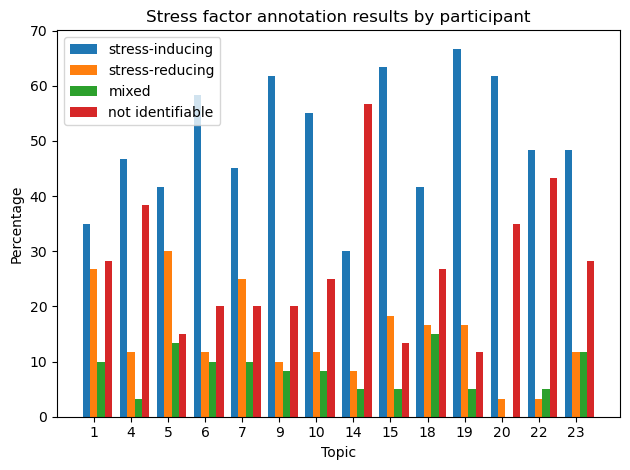

In [62]:
# Load the two CSV files
df1 = pd.read_csv('ds_stressfactor/stressfactor_researcher_results.csv', low_memory=False, lineterminator='\n')  
df2 = pd.read_csv('ds_stressfactor/stressfactor_participant_results.csv', low_memory=False, lineterminator='\n')

# Set the topic column as the index
df1.set_index('top_weighted_topic', inplace=True)
df2.set_index('top_weighted_topic', inplace=True)

# Get the labels and their percentages for each person
labels = ['stress-inducing', 'stress-reducing', 'mixed', 'not identifiable']
person1_percentages = df1[labels]
person2_percentages = df2[labels]

# Plot the bar chart
x = np.arange(len(df1))
total_width = 0.8  # Total width for each set of bars (person1 and person2)
bar_width = total_width / len(labels)  # Width for each individual bar
offset = (1 - total_width) / 2  # Offset to center the bars

fig, ax = plt.subplots()
for i, label in enumerate(labels):
    rects1 = ax.bar(x + offset + i * bar_width, person1_percentages[label], bar_width, label= label)

# Add labels, title, and legend
ax.set_xlabel('Topic')
ax.set_ylabel('Percentage')
ax.set_title('Stress factor annotation results by participant')
# ax.set_xticks(x)
ax.set_xticks(x + total_width / 2 - bar_width / 2)  # Adjust the x-axis tick positions
ax.set_xticklabels(df1.index)
ax.legend()


# Display the bar chart
plt.tight_layout()
plt.savefig('ds_stressfactor/researher-results.png')
plt.show()


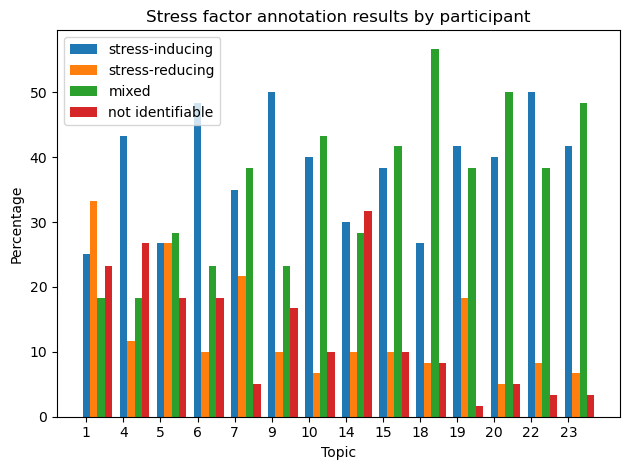

In [63]:
# Load the two CSV files
df1 = pd.read_csv('ds_stressfactor/stressfactor_researcher_results.csv', low_memory=False, lineterminator='\n')  
df2 = pd.read_csv('ds_stressfactor/stressfactor_participant_results.csv', low_memory=False, lineterminator='\n')

# Set the topic column as the index
df1.set_index('top_weighted_topic', inplace=True)
df2.set_index('top_weighted_topic', inplace=True)

# Get the labels and their percentages for each person
labels = ['stress-inducing', 'stress-reducing', 'mixed', 'not identifiable']
person1_percentages = df1[labels]
person2_percentages = df2[labels]

# Plot the bar chart
x = np.arange(len(df1))
total_width = 0.8  # Total width for each set of bars (person1 and person2)
bar_width = total_width / len(labels)  # Width for each individual bar
offset = (1 - total_width) / 2  # Offset to center the bars

fig, ax = plt.subplots()
for i, label in enumerate(labels):
#     rects1 = ax.bar(x + offset + i * bar_width, person1_percentages[label], bar_width, label= label)
    rects2 = ax.bar(x + offset + i * bar_width + bar_width, person2_percentages[label], bar_width, label= label)

# Add labels, title, and legend
ax.set_xlabel('Topic')
ax.set_ylabel('Percentage')
ax.set_title('Stress factor annotation results by participant')
# ax.set_xticks(x)
ax.set_xticks(x + total_width / 2 - bar_width / 2)  # Adjust the x-axis tick positions
ax.set_xticklabels(df1.index)
ax.legend()


# Display the bar chart
plt.tight_layout()
plt.savefig('ds_stressfactor/participant-results.png')
plt.show()
